In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import regionmask
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib.colors import SymLogNorm
from matplotlib.pyplot import cm
import regionmask

import xesmf as xe
#from pykrige.ok import OrdinaryKriging
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import dask
import utils

## Create a global array example

In [23]:
plt.plot(np.cumsum(np.arange(1,100).append(100)))


AttributeError: 'numpy.ndarray' object has no attribute 'append'

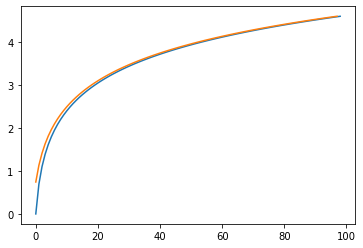

In [20]:
plt.plot(np.log(np.arange(1,100)))
plt.plot(np.log(np.arange(2.1,100.1)))

## Create a spatial emissions example

In [4]:
ds1 = xr.open_dataset('../GCrundirs/IRF_runs/RRTMG_pulse/template/mod_output/GEOSChem.SpeciesConc.20160101_0000z.nc4')
ds2 = xr.open_dataset('../GCrundirs/IRF_runs/RRTMG_pulse/SEA/Jan/mod_output/GEOSChem.SpeciesConc.20160101_0000z.nc4')
ds3 = xr.open_dataset('../GCrundirs/IRF_runs/RRTMG_base/template/Jan/mod_output/GEOSChem.SpeciesConc.20160101_0000z.nc4')
ds1*=1e9
ds2*=1e9
ds3*=1e9

In [5]:
### create a pulsed dataset
pulse_ds =  ds3.copy()
pulse_ds *= 25
sector = 'SpeciesConc_BCPI'

#pulsing all but shipping since that is offshore and we're doing land based emissions right now. when you do ocean locations you can pulse only shipping

In [6]:
### import the regions we are interested in ###
ar6_coal_location = pd.read_csv('ar6_coal_location.csv', index_col = 'number').to_dict()['acronym']

In [8]:
### Global: Modify CEDs files
regions = regionmask.defined_regions.ar6.land
r = 5
ds_new = ds3.copy()
mask = regions.mask(pulse_ds, lon_name = 'lon', lat_name = 'lat')
contiguous_mask = ~np.isnan(mask)& (mask == r)
ds_pulse_reg = pulse_ds.where(contiguous_mask) #create a mask on our pulsed dataset
ds_new[sector] = ds_pulse_reg[sector].fillna(0) + ds_new[sector] #modifying the BC_ene output, but it doesn't matter which one is chosen as all grids get the same pulse
ds_new[sector].attrs = ds3[sector].attrs
ds_ENA = ds_new

Text(0.5, 1.0, 'Black Carbon Concentrations')

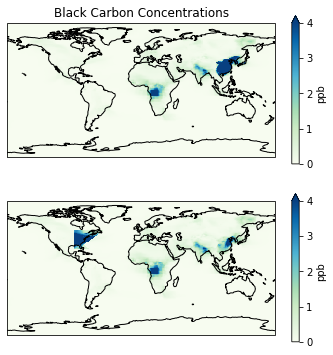

In [14]:
fig, [ax1,ax3] = plt.subplots(2,1, figsize = [6,6], sharey = True, sharex = True, subplot_kw={'projection':ccrs.PlateCarree()})
vmin = 0
vmax = 4
cbar = 'GnBu'
ds1['SpeciesConc_BCPI'].isel(lev = 0).plot(transform = ccrs.PlateCarree(), ax = ax1, vmax = vmax, vmin = vmin, cmap = cbar, cbar_kwargs=dict(label='ppb'))
#(ds2['SpeciesConc_BCPI'].isel(lev = 0)).plot(ax = ax2, vmax = vmax, vmin = vmin, cmap = cbar, cbar_kwargs=dict(label='ppb'))
(ds_ENA['SpeciesConc_BCPI'].isel(lev = 0)*1).plot(transform = ccrs.PlateCarree(), ax = ax3, vmax = vmax, vmin = vmin, cmap = cbar, cbar_kwargs=dict(label='ppb'))
for ax in [ax1,ax3]:
    ax.set_title('')
    ax.coastlines()
ax1.set_title('Black Carbon Concentrations')
